# Cut and Paste Example using logical operators

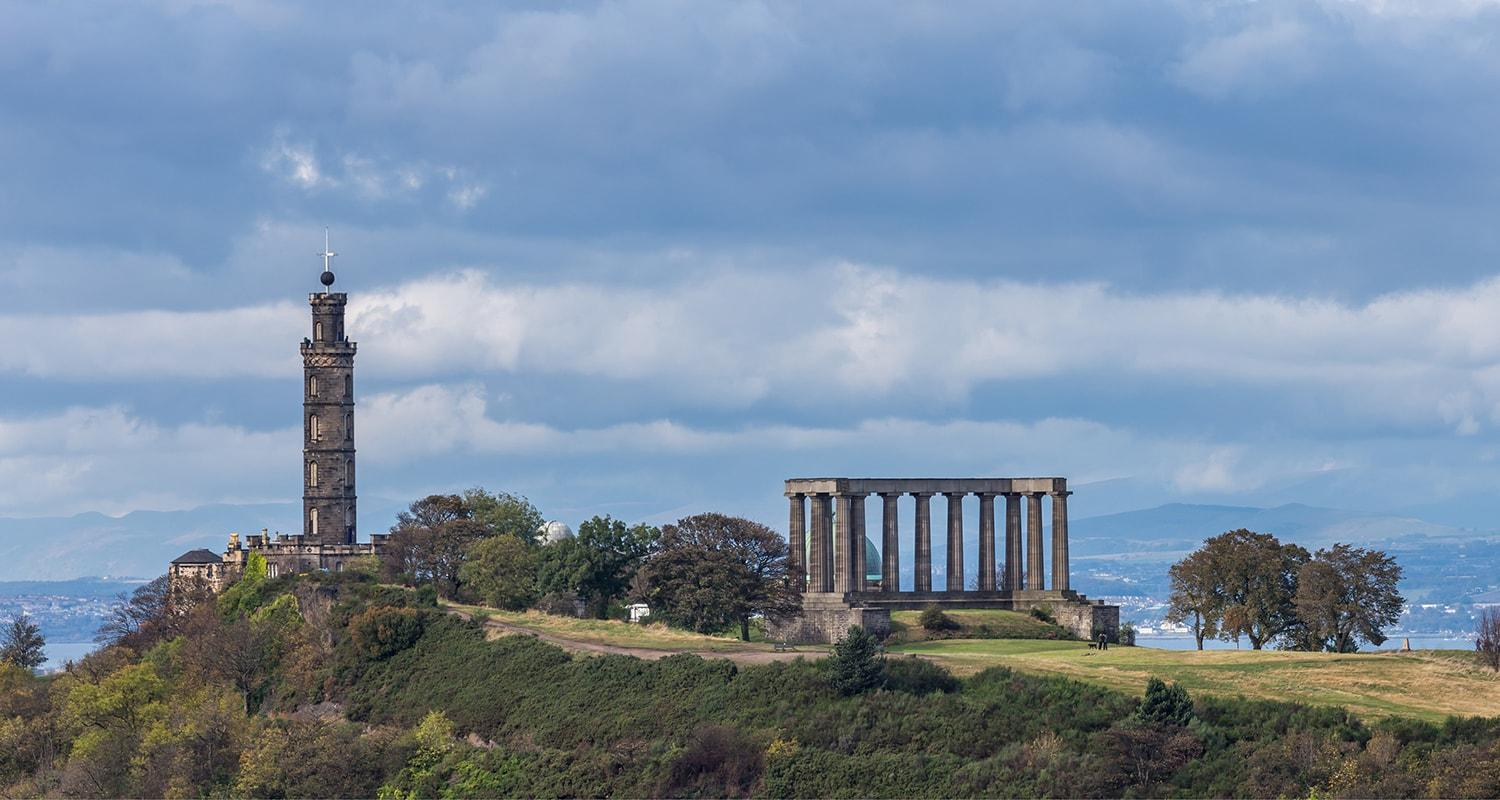

In [1]:
import numpy as np
from PIL import Image as image
from IPython.display import display, Image
from io import BytesIO

img = np.array(image.open('monument.jpg'))
f = BytesIO()
image.fromarray(img.astype('uint8')).save(f, 'jpeg')
display(Image(f.getvalue()))

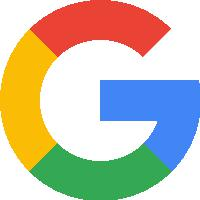

In [3]:
## Image to be pasted ###

logo = np.array(image.open('google.png'))
f = BytesIO()
image.fromarray(logo.astype('uint8')).save(f, 'jpeg')
display(Image(f.getvalue()))

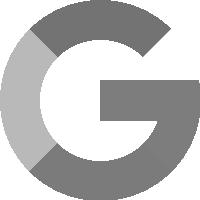

In [4]:
gray = np.zeros((logo.shape[0], logo.shape[1]))

for i in range(len(logo)):
    for j in range(len(logo[i])):
        gray[i][j] = 0.299*logo[i][j][0] + 0.587*logo[i][j][1] + 0.114*logo[i][j][2]

f = BytesIO()
image.fromarray(gray.astype('uint8')).save(f, 'jpeg')
display(Image(f.getvalue()))

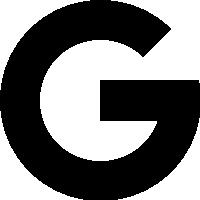

In [5]:
## Apply threshold ##

mask = np.zeros((logo.shape[0], logo.shape[1]))
for i in range(logo.shape[0]):
    for j in range(logo.shape[1]):
        mask[i][j] = 255 if gray[i][j]>220 else 0

f = BytesIO()
image.fromarray(mask.astype('uint8')).save(f, 'jpeg')
display(Image(f.getvalue()))

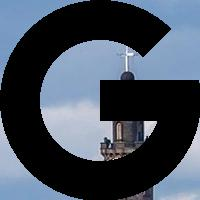

In [6]:
### pasting image at (200:400, 200:400) in original image ###

roi = img[200:400, 200:400]
andImage = np.zeros((roi.shape[0], roi.shape[1], roi.shape[2]))

for i in range(roi.shape[0]):
    for j in range(roi.shape[1]):
        for k in range(roi.shape[2]):
            andImage[i][j][k] = int(roi[i][j][k]) & int(mask[i][j])
            
f = BytesIO()
image.fromarray(andImage.astype('uint8')).save(f, 'jpeg')
display(Image(f.getvalue()))

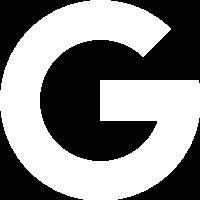

In [7]:
### Not Operation ###

notImage = np.zeros((gray.shape[0], gray.shape[1]), dtype=np.int32)

for i in range(gray.shape[0]):
    for j in range(gray.shape[1]):
        notImage[i][j] = ~int(mask[i][j])

f = BytesIO()
image.fromarray(notImage.astype('uint8')).save(f, 'jpeg')
display(Image(f.getvalue()))

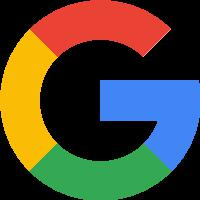

In [8]:
andLogo = np.zeros((logo.shape[0], logo.shape[1], logo.shape[2]))

for i in range(logo.shape[0]):
    for j in range(logo.shape[1]):
        for k in range(logo.shape[2]):
            andLogo[i][j][k] = int(logo[i][j][k]) & int(notImage[i][j])
            
f = BytesIO()
image.fromarray(andLogo.astype('uint8')).save(f, 'jpeg')
display(Image(f.getvalue()))

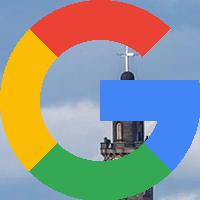

In [9]:
### Final Or Operation ###

final = np.zeros((logo.shape[0], logo.shape[1], logo.shape[2]))
for i in range(logo.shape[0]):
    for j in range(logo.shape[1]):
        for k in range(logo.shape[2]):
            final[i][j][k] = int(andImage[i][j][k]) | int(andLogo[i][j][k])

f = BytesIO()
image.fromarray(final.astype('uint8')).save(f, 'jpeg')
display(Image(f.getvalue()))

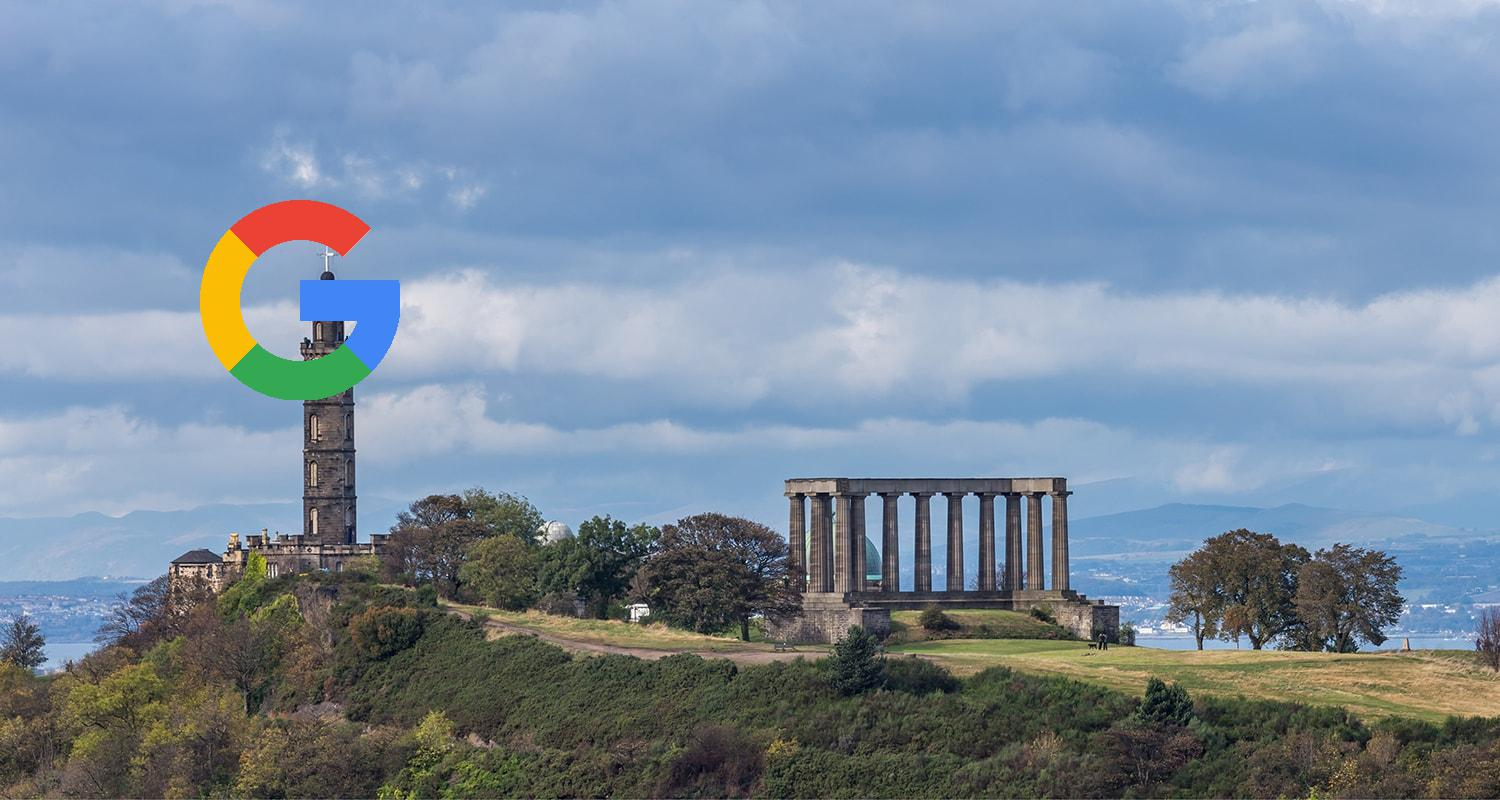

In [10]:
### ADD ###

img[200:400, 200:400, :] = final
f = BytesIO()
image.fromarray(img.astype('uint8')).save(f, 'jpeg')
display(Image(f.getvalue()))